In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 4, 8)

In [3]:
# Axis Bank
AXIS = data.DataReader('AXISBANK.BO', 'yahoo', start, end)
#HDFC Bank
HDFC = data.DataReader('HDFCBANK.NS','yahoo', start, end)
#INDUSIND Bank
INDUS = data.DataReader('INDUSINDBK.BO','yahoo', start, end)
#ICICI Bank
ICICI = data.DataReader('ICICIBANK.BO','yahoo', start, end)
#SBI Bank
SBI = data.DataReader('SBIN.NS','yahoo', start, end)
#Kotak bank
KOTAK = data.DataReader('KOTAKBANK.NS','yahoo', start, end)

In [4]:
tickers = ['AXIS', 'HDFC', 'INDUS', 'ICICI', 'SBI', 'KOTAK']

In [5]:
bank_stocks = pd.concat([AXIS, HDFC, INDUS, ICICI, SBI, KOTAK],axis=1,keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.tail(3)

Bank Ticker        AXIS                                                \
Stock Info         High         Low        Open       Close    Volume   
Date                                                                    
2021-04-06   693.500000  675.150024  689.950012  677.849976  496500.0   
2021-04-07   691.900024  669.000000  680.000000  688.150024  984993.0   
2021-04-08   695.400024  679.400024  690.549988  681.650024  216646.0   

Bank Ticker                     HDFC                                         \
Stock Info    Adj Close         High          Low         Open        Close   
Date                                                                          
2021-04-06   677.849976  1462.650024  1432.650024  1460.000000  1440.250000   
2021-04-07   688.150024  1456.699951  1421.550049  1439.300049  1447.199951   
2021-04-08   681.650024  1460.900024  1430.500000  1453.000000  1432.800049   

Bank Ticker  ...         SBI                                            KOTAK  \
Stock Info   ...        Open       Close      Volume   Adj Close         High   
Date         ...                                                                
2021-04-06   ...  355.700012  350.549988  44147709.0  350.549988  1781.449951   
2021-04-07   ...  351.250000  358.549988  48023602.0  358.549988  1810.699951   
2021-04-08   ...  361.000000  355.600006  33370259.0  355.600006  1823.699951   

Bank Ticker                                                                 
Stock Info           Low         Open        Close     Volume    Adj Close  
Date                                                                        
2021-04-06   1728.699951  1776.000000  1768.300049  2873045.0  1768.300049  
2021-04-07   1745.599976  1766.050049  1792.000000  3158142.0  1792.000000  
2021-04-08   1778.699951  1796.000000  1783.250000  2890290.0  1783.250000  

[3 rows x 36 columns]

# EDA, Exploratory Data Analysis

In [8]:
#finding the maximum share prices for all stocks
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
AXIS      821.400024
HDFC     1626.650024
INDUS    2021.550049
ICICI     674.000000
SBI       415.200012
KOTAK    2019.650024
dtype: float64

In [9]:
#calculating returns for all stocks and storing it in a returns dataframe
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,AXIS Returns,HDFC Returns,INDUS Returns,ICICI Returns,SBI Returns,KOTAK Returns
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.017069,0.000879,-0.001756,0.009842,0.000371,0.009904
2010-01-06,-0.014554,0.000674,0.024631,0.008563,0.005999,0.012153
2010-01-07,0.007686,0.002605,-0.017170,-0.011060,-0.005595,0.011235
2010-01-08,0.010569,0.001314,-0.007338,-0.012934,-0.002987,-0.006172


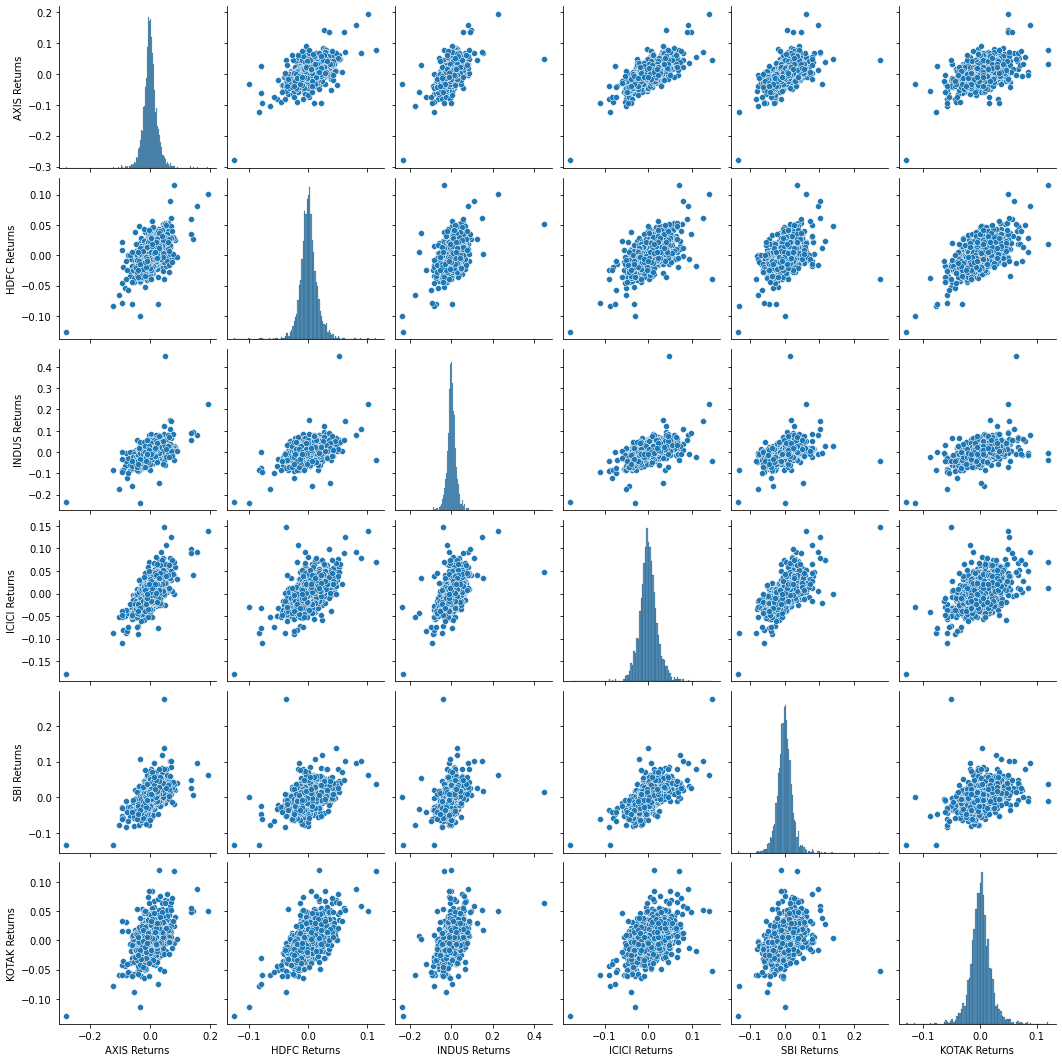

In [11]:
#creating a pair-plot of this data
#returns[1:] since first row of our data is NaN values
import seaborn as sns
sns.pairplot(returns[1:])

In [12]:
#finding when the stocks had best and worst returns
#worst returns
returns.idxmin()

AXIS Returns    2020-03-23
HDFC Returns    2020-03-23
INDUS Returns   2020-03-18
ICICI Returns   2020-03-23
SBI Returns     2020-03-23
KOTAK Returns   2020-03-23
dtype: datetime64[ns]

In [13]:
#best returns
returns.idxmax()

AXIS Returns    2020-04-07
HDFC Returns    2020-03-25
INDUS Returns   2020-03-26
ICICI Returns   2017-10-25
SBI Returns     2017-10-25
KOTAK Returns   2020-10-27
dtype: datetime64[ns]

In [14]:
#let's see standard deviation of all of them and see which is riskiest of them all.
returns.std()    #Indusind bank is riskiest.

AXIS Returns     0.023085
HDFC Returns     0.015005
INDUS Returns    0.025769
ICICI Returns    0.021586
SBI Returns      0.022127
KOTAK Returns    0.018333
dtype: float64

In [15]:
returns['2019-04-08':'2021-04-08'].std()

#here too Indus is riskiest

AXIS Returns     0.031639
HDFC Returns     0.021485
INDUS Returns    0.044831
ICICI Returns    0.027583
SBI Returns      0.027965
KOTAK Returns    0.023420
dtype: float64

C:\Users\nairr\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AXIS Returns', ylabel='Density'>

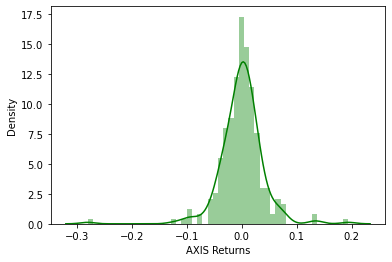

In [16]:
sns.distplot(returns['2020-01-01':'2020-12-31']['AXIS Returns'],color='green',bins=50)


# Lets Use better visualisations and get better understanding

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

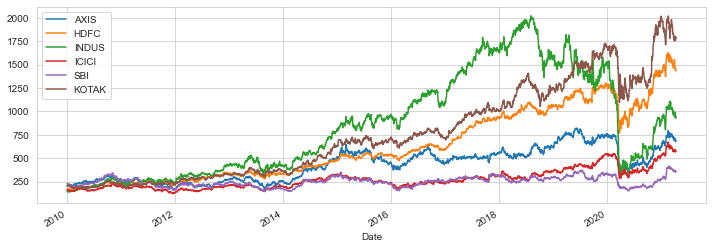

In [18]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

Lets do this using .xs as well for future references

<AxesSubplot:xlabel='Date'>

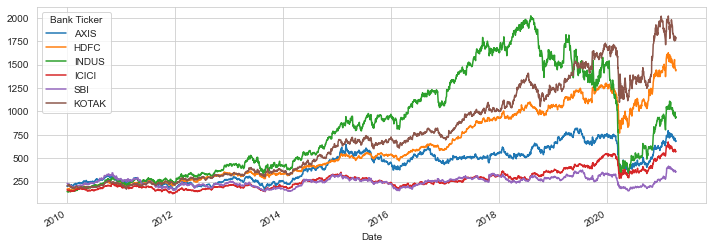

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

now let's call the plotly library to visualize it even better.

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

Moving Averages
Let's analyze the moving averages for these stocks in the year 2014.
whatever is stated in window that many values will be considered for rolling value.
so 30 day avg, 60 day avg, weekly avg everything could be plotted.

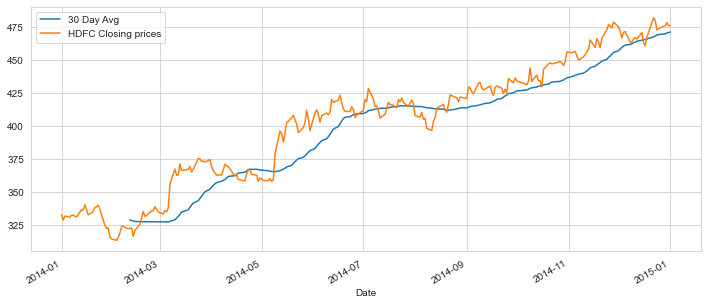

In [21]:
plt.figure(figsize=(12,5))
HDFC['2014-01-01':'2015-01-01']['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
HDFC['2014-01-01':'2015-01-01']['Close'].plot(label='HDFC Closing prices')
plt.legend()

In [22]:
#let's go ahead and make a heatmap.
#But first lets make a corr() and then use it for heatmap

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,AXIS,HDFC,INDUS,ICICI,SBI,KOTAK
Bank Ticker,,,,,,
AXIS,1.000000,0.871669,0.826478,0.852634,0.702808,0.875586
HDFC,0.871669,1.000000,0.748282,0.918684,0.524473,0.992661
INDUS,0.826478,0.748282,1.000000,0.565850,0.565769,0.721977
ICICI,0.852634,0.918684,0.565850,1.000000,0.636828,0.926799
SBI,0.702808,0.524473,0.565769,0.636828,1.000000,0.506202
KOTAK,0.875586,0.992661,0.721977,0.926799,0.506202,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

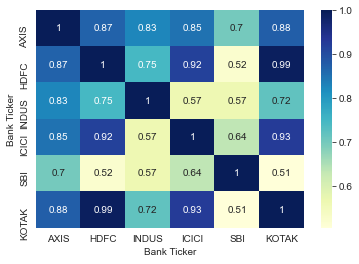

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot = True,cmap="YlGnBu")

In [21]:
#Lets make it in plotly and check how it looks
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='YlGnBu')

# Let's make our plots a little bit more technical and sensible from a financial perspective. We can make candle stick charts,simple moving averages etc as well using plotly. Bhagu ya chala kasa kay te.

In [22]:
#for HDFC stock price data for 2020 year lets make candle stick chart
HDFC2020 = HDFC['2020-01-01':'2020-12-31'][['Open','High','Low','Close']]
HDFC2020.iplot(kind='candle')

In [27]:
KOTAK['Close']['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')